In [2]:
from glob import glob
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from glob import glob

## Load processed glider profiles 
(created with data_processing_notebooks/process_gliders.ipynb)

In [3]:
filelist=[]
for files in glob('../../Freshwater-glider-paper/data/proc/Glider_spice/*spice*.nc'): 
    #print(files)
    filelist.append(files)
    filelist.sort()

missions=[]
for glid in range(0,len(filelist)):
    Gdr = xr.open_dataset(filelist[glid])
    missions.append(Gdr)
    
Gdr = xr.concat(missions, dim = 'mission')

#restrict to Hawkesbury shelf region
Gdr = Gdr.where((Gdr.dive_lat<-32.5) & (Gdr.dive_lat>-34) & (Gdr.bathydepth>-1000))

In [4]:
# load bathymetry
bath = xr.open_dataset('../data/subset_ETOPO1_Ice_g_gmt4.grd')

In [5]:
# read in sentinel 2 image
image = plt.imread('../data/sentinel_rgb.png')

In [11]:
def glid_map_small():
    ax = plt.subplot(121, projection=ccrs.PlateCarree())
    ax.set_extent([150.8, 153, -34.5, -32], crs=ccrs.PlateCarree())
    
    cs=bath.z.plot.contour(levels=[-100, -200, -1000, -2000],colors='k',transform=ccrs.PlateCarree())
    cs.clabel(fontsize=12, inline=1)

    # Gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.MaxNLocator(6)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',facecolor='none', name='coastline')
    feature = ax.add_feature(coast, edgecolor='black',facecolor='lightgray')
    #ax.add_feature(cfeature.GSHHSFeature('h', edgecolor='black', facecolor='lightgrey'))
    #plot PH100 position
    plt.plot(151.2252666667,-34.1192,'*', color='yellow',markersize=20,markeredgewidth=2, markeredgecolor='black')

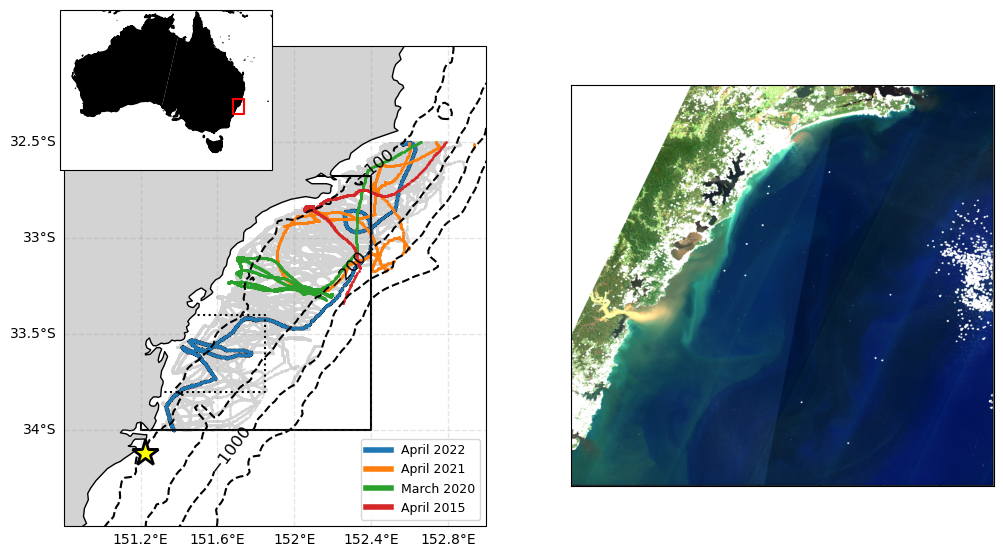

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = glid_map_small()

# Glider Data
for mission in Gdr.mission:
    ds = Gdr.sel(mission=mission)
    plt.scatter(ds.dive_lon,ds.dive_lat,c='lightgrey', marker='o',s=.5 ,transform=ccrs.PlateCarree());

#wet_missions = [2,5,7,12,26,31,36,39,40]
wet_missions = [5,12,31,36,40] #extreme missions only
ds = Gdr.sel(mission=40)
plt.scatter(ds.dive_lon,ds.dive_lat, marker='o',s=2,color='black' ,transform=ccrs.PlateCarree());

ds = Gdr.sel(mission=40)
plt.scatter(ds.dive_lon,ds.dive_lat, marker='o',s=1 ,transform=ccrs.PlateCarree(),label='April 2022');
ds = Gdr.sel(mission=36)
plt.scatter(ds.dive_lon,ds.dive_lat, marker='o',s=1 ,transform=ccrs.PlateCarree(),label='April 2021');
ds = Gdr.sel(mission=31)
plt.scatter(ds.dive_lon,ds.dive_lat, marker='o',s=1 ,transform=ccrs.PlateCarree(),label='March 2020');
ds = Gdr.sel(mission=12)
plt.scatter(ds.dive_lon,ds.dive_lat, marker='o',s=1 ,transform=ccrs.PlateCarree(),label='April 2015');
ds = Gdr.sel(mission=5)
plt.scatter(ds.dive_lon,ds.dive_lat, marker='o',s=1 ,transform=ccrs.PlateCarree(),label='Dec 2010');
plt.legend(loc='lower right')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C0', lw=4),
                Line2D([0], [0], color='C1', lw=4),
                Line2D([0], [0], color='C2', lw=4),
                Line2D([0], [0], color='C3', lw=4),]

plt.legend(custom_lines, ['April 2022', 'April 2021', 'March 2020', 'April 2015'],
           loc='lower right',fontsize=9)
    
# plot box of Sentinel 2 image
x = [151.2, 151.2, 152.4, 152.4, 151.2]
y = [-32.68,-34,-34,-32.68,-32.68]
plt.plot(x, y, transform=ccrs.PlateCarree(),color = 'black',zorder=1)

# plot for velocity box
x = [151.15, 151.15, 151.85, 151.85, 151.15]
y = [-33.4,-33.8,-33.8,-33.4,-33.4]
plt.plot(x, y, transform=ccrs.PlateCarree(),color = 'black', linestyle = 'dotted', zorder=1)


#add sentinel2 image
ax2 = plt.subplot(122)
plt.imshow(image)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

# add outline of Australia
ax = fig.add_axes([.11,.64,.2,.2],projection=ccrs.PlateCarree())
ax.set_extent([110, 160, -45, -10])
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',facecolor='none', name='coastline')
feature = ax.add_feature(coast, edgecolor='black',facecolor='black')
[150.8, 153.5, -34.5, -31]
x = [150.8, 150.8, 153.5, 153.5, 150.8]
y = [-31, -34.5, -34.5, -31, -31]
ax.plot(x, y, transform=ccrs.PlateCarree(),color = 'red')
